In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../../src/')
from helper_functions import *
plt.style.use('dynamics_site')
import time

In [5]:
def integrate_PC_EulerTrap(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]

    for i in range(steps-1):
        #do prediction with euler
        new_vvec_prime = vvec + dt*get_acclerations(rvec,mvec)
        new_rvec_prime = rvec + dt*vvec
        #now do correction with trapezoidal
        new_vvec = vvec + 0.5*dt*(get_acclerations(rvec,mvec) +get_acclerations(new_rvec_prime,mvec))
        new_rvec = rvec + 0.5*dt*(vvec+ new_vvec_prime)

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

In [6]:
def integrate_PC_ABM32(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    
    #we compute the first steps with forward euler
    new_vvec = vvec + dt*get_acclerations(Rs[0],mvec)
    new_rvec = rvec + dt*Vs[0]
    Rs.append(new_rvec)
    Vs.append(new_vvec)
    new_vvec = vvec + dt*get_acclerations(Rs[1],mvec)
    new_rvec = rvec + dt*Vs[1]
    Rs.append(new_rvec)
    Vs.append(new_vvec)

    for i in range(steps-1):
        #do prediction with AB
        new_vvec_prime = vvec + (dt/12)*(23*get_acclerations(Rs[-1],mvec) - 16*get_acclerations(Rs[-2],mvec) + 5*get_acclerations(Rs[-3],mvec))
        new_rvec_prime = rvec + (dt/12)*(23*Vs[-1] - 16*Vs[-2] + 5*Vs[-3])
        #now do correction with AM        
        new_vvec = vvec + 0.5*dt*(get_acclerations(rvec,mvec) +get_acclerations(new_rvec_prime,mvec))
        new_rvec = rvec + 0.5*dt*(vvec+ new_vvec_prime)
        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

def integrate_PC_ABM23(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    
    #we compute the first steps with forward euler
    new_vvec = vvec + dt*get_acclerations(Rs[0],mvec)
    new_rvec = rvec + dt*Vs[0]
    Rs.append(new_rvec)
    Vs.append(new_vvec)

    for i in range(steps-1):
        #do prediction with AB
        new_vvec_prime = Vs[-1] + (dt/2)*(3*get_acclerations(Rs[-1],mvec) - 1*get_acclerations(Rs[-2],mvec) )
        new_rvec_prime = Rs[-1] + (dt/2)*(3*Vs[-1] - 1*Vs[-2])
        new_vvec = vvec + (dt/12)*(5*get_acclerations(new_rvec_prime,mvec) + 8*get_acclerations(Rs[-1],mvec) - 1*get_acclerations(Rs[-2],mvec) )
        new_rvec = rvec + (dt/12)*(5*new_vvec_prime + 8*Vs[-1] - 1*Vs[-2])
        new_rvec_prime = new_rvec
        new_vvec_prime = new_vvec

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

def integrate_PC_ABM33(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    
    #we compute the first steps with forward euler
    new_vvec = vvec + dt*get_acclerations(Rs[0],mvec)
    new_rvec = rvec + dt*Vs[0]
    Rs.append(new_rvec)
    Vs.append(new_vvec)
    new_vvec = vvec + dt*get_acclerations(Rs[1],mvec)
    new_rvec = rvec + dt*Vs[1]
    Rs.append(new_rvec)
    Vs.append(new_vvec)

    for i in range(steps-1):
        #do prediction with AB
        new_vvec_prime = vvec + (dt/12)*(23*get_acclerations(Rs[-1],mvec) - 16*get_acclerations(Rs[-2],mvec) + 5*get_acclerations(Rs[-3],mvec))
        new_rvec_prime = rvec + (dt/12)*(23*Vs[-1] - 16*Vs[-2] + 5*Vs[-3])
        #now do correction with AM
        new_vvec = vvec + (dt/12)*(5*get_acclerations(new_rvec_prime,mvec) + 8*get_acclerations(Rs[-1],mvec) - 1*get_acclerations(Rs[-2],mvec) )
        new_rvec = rvec + (dt/12)*(5*new_vvec_prime + 8*Vs[-1] - 1*Vs[-2])

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

In [7]:
dts = np.logspace(-1.5,-5,15)
steps = (1/dts).astype(int) #run simulation for 1 year

E_PCET = []
T_PCET = []
E_PCABM23 = []
T_PCABM23 = []
E_PCABM32 = []
T_PCABM32 = []
E_PCABM33 = []
T_PCABM33 = []

for i in range(len(dts)):
    dt = dts[i]
    step = steps[i]
    
    start = time.time()
    _,_,Es = integrate_PC_EulerTrap('../../src/Earth-Venus-Sun.npy',dt,step)
    end = time.time()
    T_PCET.append(end-start)
    E_PCET.append(np.abs(Es[0]-Es[-1]))
    
    start = time.time()
    _,_,Es = integrate_PC_ABM23('../../src/Earth-Venus-Sun.npy',dt,step)
    end = time.time()
    T_PCABM23.append(end-start)
    E_PCABM23.append(np.abs(Es[0]-Es[-1]))

    start = time.time()
    _,_,Es = integrate_PC_ABM32('../../src/Earth-Venus-Sun.npy',dt,step)
    end = time.time()
    T_PCABM32.append(end-start)
    E_PCABM32.append(np.abs(Es[0]-Es[-1]))

    start = time.time()
    _,_,Es = integrate_PC_ABM33('../../src/Earth-Venus-Sun.npy',dt,step)
    end = time.time()
    T_PCABM33.append(end-start)
    E_PCABM33.append(np.abs(Es[0]-Es[-1]))


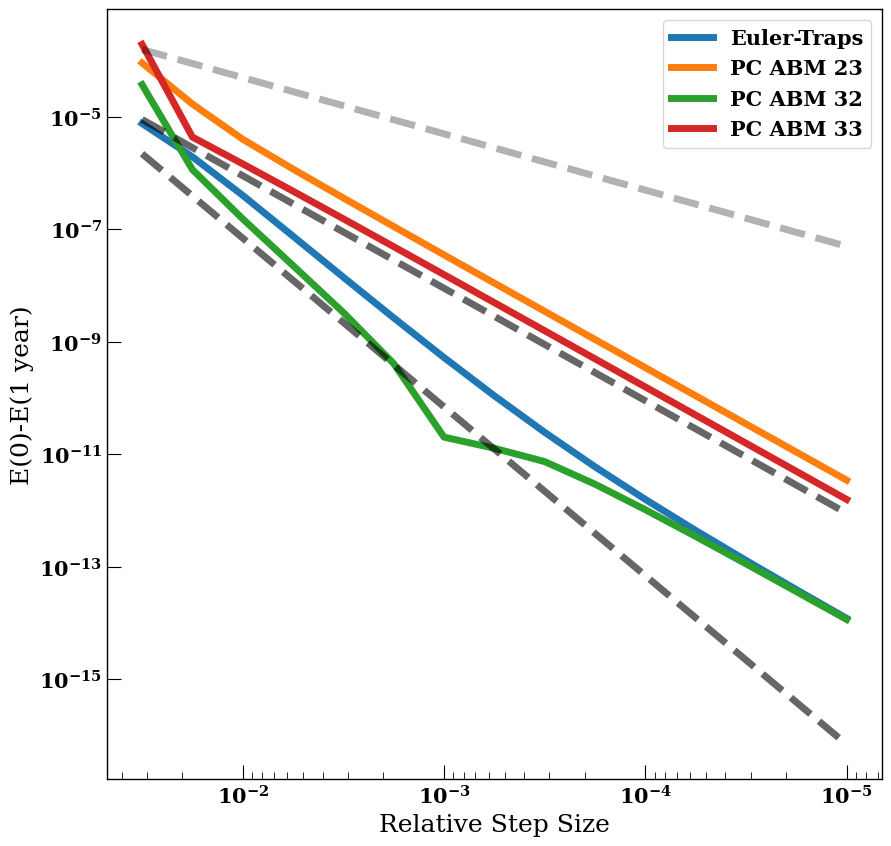

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(dts,E_PCET,label='Euler-Traps')
plt.plot(dts,E_PCABM23,label='PC ABM 23')
plt.plot(dts,E_PCABM32,label='PC ABM 32')
plt.plot(dts,E_PCABM33,label='PC ABM 33')
plt.plot(dts,dts*5e-3,c='k',ls='--',alpha=0.3)
plt.plot(dts,(dts**2)*9e-3,c='k',ls='--',alpha=0.6)
plt.plot(dts,(dts**3)*7e-2,c='k',ls='--',alpha=0.6)
plt.xscale('log')
plt.yscale('log')

plt.gca().invert_xaxis()
plt.xlabel("Relative Step Size")
plt.ylabel("E(0)-E(1 year)")
ax.legend(loc='best')
plt.savefig('multistep_errorstep.png')

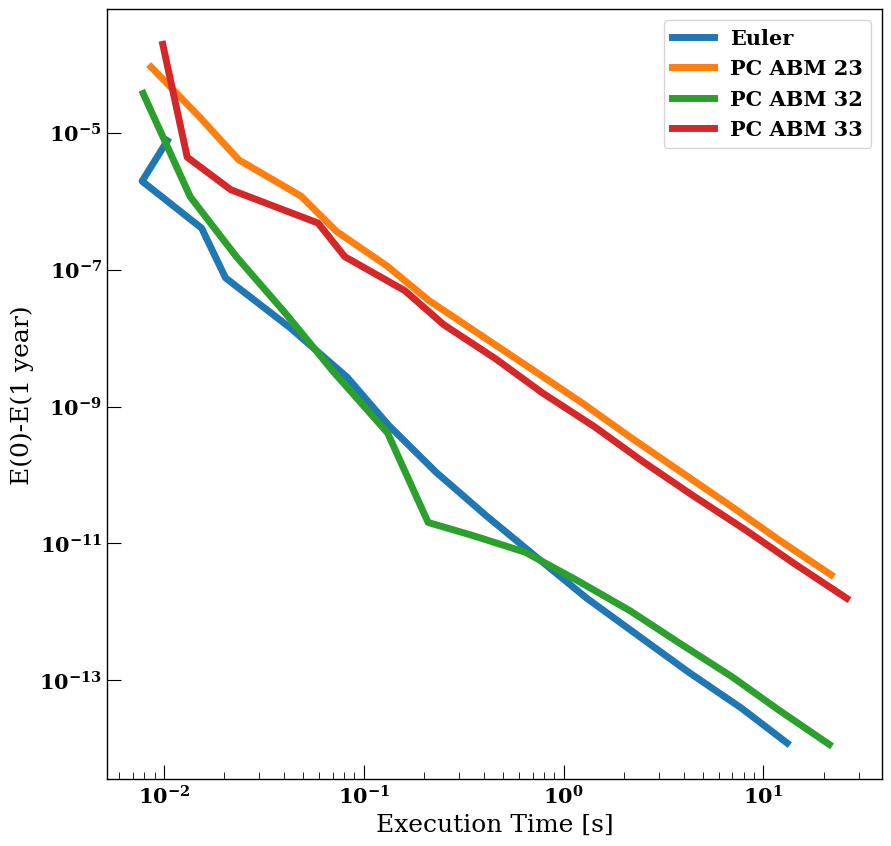

In [9]:
fig,ax = plt.subplots(figsize=(10,10))

plt.plot(T_PCET,E_PCET,label='Euler')
plt.plot(T_PCABM23,E_PCABM23,label='PC ABM 23')
plt.plot(T_PCABM32,E_PCABM32,label='PC ABM 32')
plt.plot(T_PCABM33,E_PCABM33,label='PC ABM 33')

#plt.plot(T_AB3,(np.array(T_AB3)**-1)*2e-7,c='k',ls='--',alpha=0.3)
#plt.plot(T_AB3,(np.array(T_AB3)**-2)*3e-11,c='k',ls='--',alpha=0.6)
#plt.plot(T_AB3,(np.array(T_AB3)**-3)*1e-13,c='k',ls='--',alpha=0.6)
plt.xscale('log')
plt.yscale('log')

#plt.gca().invert_xaxis()
plt.xlabel("Execution Time [s]")
plt.ylabel("E(0)-E(1 year)")
ax.legend(loc='best')
plt.savefig('multistep_errortime.png')
plt.show()